In [899]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [644]:
telecom_dataframe=pd.read_csv('telecom_churn_data.csv',  sep = ',',encoding = "ISO-8859-1", header= 0)

In [645]:
telecom_dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


#### Check Duplicates

In [646]:
telecom_dataframe.mobile_number.count()

99999

In [647]:
len(telecom_dataframe.mobile_number.unique())

99999

In [648]:
telecom_dataframe.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [649]:
#Renaming  with other's format
telecom_dataframe=telecom_dataframe.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6', 'sep_vbc_3g':'vbc_3g_9'})

#### Handling missing values

In [650]:
#Rows having all missing values
telecom_dataframe.isnull().all(axis=1).sum()

0

In [651]:
#Columns having all missing values
telecom_dataframe.isnull().all(axis=0).sum()

0

In [652]:
# summing up the missing values (column-wise)
missing_vals_column_wise=round(100*(telecom_dataframe.isnull().sum()/len(telecom_dataframe.index)), 2).sort_values(ascending=False)
missing_vals_column_wise

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

#### Lets look at the column we need to measure high value customer

In [653]:
rech_cols=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8','total_rech_num_9', 'total_rech_amt_6',\
           'total_rech_amt_7','total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6','max_rech_amt_7', \
           'max_rech_amt_8', 'max_rech_amt_9','total_rech_data_6', 'total_rech_data_7',\
           'total_rech_data_8','total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7','max_rech_data_8',\
           'max_rech_data_9', 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom_dataframe[rech_cols].head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,...,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,...,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,...,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,...,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,...,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [654]:
#missing value in rech cols
round(100*(telecom_dataframe[rech_cols].isnull().sum()/len(telecom_dataframe[rech_cols].index)), 2).sort_values(ascending=False)

max_rech_data_6       74.85
av_rech_amt_data_6    74.85
total_rech_data_6     74.85
av_rech_amt_data_7    74.43
total_rech_data_7     74.43
max_rech_data_7       74.43
av_rech_amt_data_9    74.08
total_rech_data_9     74.08
max_rech_data_9       74.08
total_rech_data_8     73.66
max_rech_data_8       73.66
av_rech_amt_data_8    73.66
total_rech_amt_7       0.00
total_rech_num_7       0.00
total_rech_num_8       0.00
total_rech_num_9       0.00
total_rech_amt_6       0.00
max_rech_amt_9         0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
total_rech_num_6       0.00
dtype: float64

In [655]:
telecom_dataframe[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8','total_rech_num_9', 'total_rech_amt_6',\
           'total_rech_amt_7','total_rech_amt_8', 'total_rech_amt_9']].head(20)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
0,4,3,2,6,362,252,252,0
1,4,9,11,5,74,384,283,121
2,5,4,2,7,168,315,116,358
3,10,11,18,14,230,310,601,410
4,5,6,3,4,196,350,287,200
5,2,2,3,3,120,0,130,130
6,15,10,11,7,499,222,294,141
7,5,5,7,3,1580,790,3638,0
8,19,21,14,15,437,601,120,186
9,4,2,5,3,220,195,210,180


In [656]:
telecom_dataframe[['total_rech_data_6', 'total_rech_data_7',\
           'total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9']].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


Clearly the recharge columns are null where there was no recharge made. So lets impute them with 0.

In [657]:
telecom_dataframe[rech_cols]=telecom_dataframe[rech_cols].fillna(0, axis=1)

#### Filter high value customer who are in to 30% of max recharge both in calls and data based on good phase

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


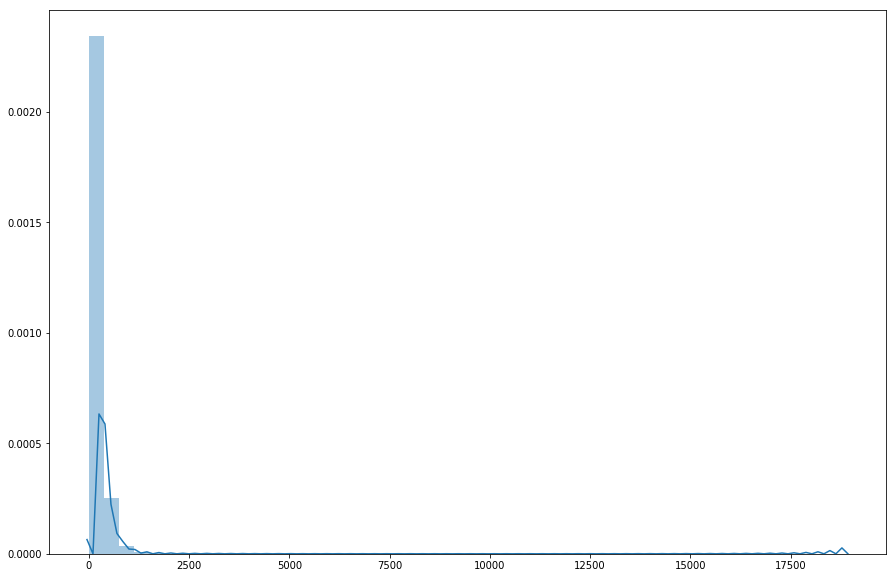

In [658]:
filter_cols=['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']


#Distribution of avg recharge amount in good phase

plt.figure(figsize=(15,10))

sns.distplot(telecom_dataframe[filter_cols].mean(axis=1))
plt.show()

In [659]:
telecom_dataframe=telecom_dataframe[(telecom_dataframe[filter_cols].mean(axis=1) >= telecom_dataframe[filter_cols].mean(axis=1).quantile(0.7))]

In [660]:
telecom_dataframe.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,3.001500e+04,30015.0,29791.0,29791.0,29791.0,30015.000000,30015.000000,30015.000000,30015.000000,29519.000000,...,30015.000000,14897.000000,15157.000000,14469.000000,13948.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000
mean,7.001216e+09,109.0,0.0,0.0,0.0,576.410674,578.374381,524.580928,481.385226,280.977202,...,0.170948,0.920118,0.914561,0.880088,0.877115,1243.773413,164.289564,173.460073,153.779074,7.539631
std,6.869097e+05,0.0,0.0,0.0,0.0,448.983873,469.004372,496.017589,498.341098,463.303625,...,1.000731,0.271119,0.279543,0.324869,0.328317,970.776817,419.338713,444.086828,415.941458,51.207185
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,109.0,0.0,0.0,0.0,345.426000,346.731000,266.123500,219.143000,29.010000,...,0.000000,1.000000,1.000000,1.000000,1.000000,469.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001220e+09,109.0,0.0,0.0,0.0,490.373000,488.367000,442.864000,404.114000,106.560000,...,0.000000,1.000000,1.000000,1.000000,1.000000,883.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001805e+09,109.0,0.0,0.0,0.0,702.041000,699.961000,666.147500,632.209000,325.785000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1862.500000,104.650000,108.820000,74.820000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handelling missing values for tagging churn customers 

In [661]:

churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
round(100*(telecom_dataframe[churn_cols].isnull().sum()/len(telecom_dataframe[churn_cols].index)), 2).sort_values(ascending=False)

vol_3g_mb_9       0.0
vol_2g_mb_9       0.0
total_og_mou_9    0.0
total_ic_mou_9    0.0
dtype: float64

#### Clearly there are no missing values. Lets tag churn customers

In [662]:
def tag_churn(x):
    if x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 == 0 and x.vol_3g_mb_9 == 0:
        return 1
    else:
        return 0
telecom_dataframe['churn']=telecom_dataframe.apply(tag_churn,axis=1)

In [663]:
telecom_dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,0


In [664]:
#Drop all churn phase columns
churn_phase_attr=[x for x in telecom_dataframe.keys() if x.strip()[-2:] == '_9']
telecom_dataframe=telecom_dataframe.drop(churn_phase_attr,axis=1)
telecom_dataframe.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_o

In [665]:
# summing up the missing values (column-wise)
missing_vals_column_wise=round(100*(telecom_dataframe.isnull().sum()/len(telecom_dataframe.index)), 2).sort_values(ascending=False)
missing_vals_column_wise[missing_vals_column_wise > 40]

count_rech_2g_8             51.79
fb_user_8                   51.79
count_rech_3g_8             51.79
night_pck_user_8            51.79
arpu_2g_8                   51.79
date_of_last_rech_data_8    51.79
arpu_3g_8                   51.79
arpu_2g_6                   50.37
fb_user_6                   50.37
count_rech_3g_6             50.37
night_pck_user_6            50.37
date_of_last_rech_data_6    50.37
count_rech_2g_6             50.37
arpu_3g_6                   50.37
arpu_2g_7                   49.50
night_pck_user_7            49.50
count_rech_3g_7             49.50
arpu_3g_7                   49.50
count_rech_2g_7             49.50
fb_user_7                   49.50
date_of_last_rech_data_7    49.50
dtype: float64

In [666]:
#date columns
date_cols=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',\
           'date_of_last_rech_7','date_of_last_rech_8',\
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

round(100*(telecom_dataframe[date_cols].isnull().sum()/len(telecom_dataframe[date_cols].index)), 2).sort_values(ascending=False)

date_of_last_rech_data_8    51.79
date_of_last_rech_data_6    50.37
date_of_last_rech_data_7    49.50
date_of_last_rech_8          1.93
last_date_of_month_8         0.52
date_of_last_rech_7          0.32
date_of_last_rech_6          0.20
last_date_of_month_7         0.09
last_date_of_month_6         0.00
dtype: float64

In [667]:
telecom_dataframe[date_cols].head(10)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
16,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014,NaN,NaN,NaN
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
33,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/26/2014,6/30/2014,7/28/2014,8/26/2014
38,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/28/2014,8/24/2014,NaN,NaN,NaN
41,6/30/2014,7/31/2014,8/31/2014,6/24/2014,7/22/2014,8/31/2014,NaN,NaN,NaN
48,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/23/2014,8/28/2014,NaN,NaN,NaN
53,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/31/2014,8/26/2014,6/29/2014,7/26/2014,8/2/2014


In [668]:
telecom_dataframe['last_date_of_month_6']=telecom_dataframe['last_date_of_month_6'].fillna('6/30/2014',axis=0)
telecom_dataframe['last_date_of_month_7']=telecom_dataframe['last_date_of_month_7'].fillna('7/31/2014',axis=0)
telecom_dataframe['last_date_of_month_8']=telecom_dataframe['last_date_of_month_8'].fillna('8/31/2014',axis=0)

In [669]:
#since all other date columns signifies if recharrge has made on particular month, lets convert them into categorical variable
telecom_dataframe['rech_in_6']=telecom_dataframe['date_of_last_rech_6'].apply(lambda x: 0 if pd.isnull(x) else 1)
telecom_dataframe['rech_in_7']=telecom_dataframe['date_of_last_rech_7'].apply(lambda x: 0 if pd.isnull(x) else 1)
telecom_dataframe['rech_in_8']=telecom_dataframe['date_of_last_rech_8'].apply(lambda x: 0 if pd.isnull(x) else 1)
telecom_dataframe['rech_data_in_6']=telecom_dataframe['date_of_last_rech_data_6'].apply(lambda x: 0 if pd.isnull(x) else 1)
telecom_dataframe['rech_data_in_7']=telecom_dataframe['date_of_last_rech_data_7'].apply(lambda x: 0 if pd.isnull(x) else 1)
telecom_dataframe['rech_data_in_8']=telecom_dataframe['date_of_last_rech_data_8'].apply(lambda x: 0 if pd.isnull(x) else 1)

telecom_dataframe=telecom_dataframe.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',\
                                          'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

#convert new columns into categorical cols
telecom_dataframe['rech_in_6']=telecom_dataframe['rech_in_6'].astype('category')
telecom_dataframe['rech_in_7']=telecom_dataframe['rech_in_7'].astype('category')
telecom_dataframe['rech_in_8']=telecom_dataframe['rech_in_8'].astype('category')
telecom_dataframe['rech_data_in_6']=telecom_dataframe['rech_data_in_6'].astype('category')
telecom_dataframe['rech_data_in_7']=telecom_dataframe['rech_data_in_7'].astype('category')
telecom_dataframe['rech_data_in_8']=telecom_dataframe['rech_data_in_8'].astype('category')

In [670]:
telecom_dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,rech_in_6,rech_in_7,rech_in_8,rech_data_in_6,rech_data_in_7,rech_data_in_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,30.40,0.00,101.20,1,1,1,1,1,1,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,57.74,19.38,18.74,1,1,1,1,0,0,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,21.03,910.65,122.16,0,1,1,1,0,1,1
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0.00,2.45,21.89,0,1,1,1,0,0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0.00,0.00,0.00,0,1,1,1,0,0,0


In [671]:
# summing up the missing values (column-wise)
missing_vals_column_wise=round(100*(telecom_dataframe.isnull().sum()/len(telecom_dataframe.index)), 2).sort_values(ascending=False)
missing_vals_column_wise[missing_vals_column_wise > 40]

fb_user_8           51.79
arpu_2g_8           51.79
night_pck_user_8    51.79
count_rech_3g_8     51.79
arpu_3g_8           51.79
count_rech_2g_8     51.79
arpu_2g_6           50.37
night_pck_user_6    50.37
arpu_3g_6           50.37
fb_user_6           50.37
count_rech_3g_6     50.37
count_rech_2g_6     50.37
count_rech_3g_7     49.50
arpu_2g_7           49.50
night_pck_user_7    49.50
fb_user_7           49.50
arpu_3g_7           49.50
count_rech_2g_7     49.50
dtype: float64

In [672]:
cols=['fb_user_8','arpu_2g_8','night_pck_user_8','count_rech_3g_8','arpu_3g_8','count_rech_2g_8','arpu_2g_6','night_pck_user_6','arpu_3g_6','fb_user_6','count_rech_3g_6','count_rech_2g_6','count_rech_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','arpu_3g_7','count_rech_2g_7']


telecom_dataframe[cols].head(10)

,fb_user_8,arpu_2g_8,night_pck_user_8,count_rech_3g_8,arpu_3g_8,count_rech_2g_8,arpu_2g_6,night_pck_user_6,arpu_3g_6,fb_user_6,count_rech_3g_6,count_rech_2g_6,count_rech_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7,arpu_3g_7,count_rech_2g_7
0,1.0,212.17,0.0,1.0,212.17,0.0,212.17,0.0,212.17,1.0,1.0,0.0,1.0,212.17,0.0,1.0,212.17,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.00,0.0,0.0,19.83,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,1.0,0.00,2.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1.0,391.92,0.0,1.0,405.26,0.0,931.58,1.0,897.60,1.0,5.0,0.0,8.0,2200.20,1.0,1.0,2294.03,0.0
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,0.0,0.00,0.0,0.0,0.00,1.0,12.00,0.0,0.00,1.0,0.0,4.0,0.0,0.00,0.0,0.0,0.00,5.0


In [673]:
#fb_user_6,fb_user_7,fb_user_8,night_pck_user_6,night_pck_user_7,night_pck_user_8
#--All this columns are categorical having value 1 or 0
#count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
#in these above columns null means no reach has been done
# So impute null columns by 0

cat_cols=['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

telecom_dataframe[cat_cols]=telecom_dataframe[cat_cols].fillna(0,axis=1)

telecom_dataframe['fb_user_6']=telecom_dataframe['fb_user_6'].astype('category')
telecom_dataframe['fb_user_7']=telecom_dataframe['fb_user_7'].astype('category')
telecom_dataframe['fb_user_8']=telecom_dataframe['fb_user_8'].astype('category')
telecom_dataframe['night_pck_user_6']=telecom_dataframe['night_pck_user_6'].astype('category')
telecom_dataframe['night_pck_user_7']=telecom_dataframe['night_pck_user_7'].astype('category')
telecom_dataframe['night_pck_user_8']=telecom_dataframe['night_pck_user_8'].astype('category')


num_cols=['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']

telecom_dataframe[num_cols]=telecom_dataframe[num_cols].fillna(0,axis=1)

telecom_dataframe[cat_cols].head()

,fb_user_6,fb_user_7,fb_user_8,night_pck_user_6,night_pck_user_7,night_pck_user_8
0,1.0,1.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0


In [674]:
other_cols=[x for x in cols if x not in cat_cols and x not in num_cols ]
telecom_dataframe[other_cols].head()

,arpu_2g_8,arpu_3g_8,arpu_2g_6,arpu_3g_6,arpu_2g_7,arpu_3g_7
0,212.17,212.17,212.17,212.17,212.17,212.17
7,NaN,NaN,NaN,NaN,NaN,NaN
8,0.00,19.83,NaN,NaN,0.00,0.00
16,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN


Null Value in average revenue per user can be imputed by 0

In [675]:
telecom_dataframe[other_cols]=telecom_dataframe[other_cols].fillna(0,axis=1)
telecom_dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,rech_in_6,rech_in_7,rech_in_8,rech_data_in_6,rech_data_in_7,rech_data_in_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,30.40,0.00,101.20,1,1,1,1,1,1,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,57.74,19.38,18.74,1,1,1,1,0,0,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,21.03,910.65,122.16,0,1,1,1,0,1,1
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0.00,2.45,21.89,0,1,1,1,0,0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0.00,0.00,0.00,0,1,1,1,0,0,0


In [676]:
# summing up the missing values (column-wise)
missing_vals_column_wise=round(100*(telecom_dataframe.isnull().sum()/len(telecom_dataframe.index)), 2).sort_values(ascending=False)
missing_vals_column_wise[missing_vals_column_wise > 0]

std_ic_t2f_mou_8    3.63
loc_og_t2t_mou_8    3.63
loc_og_t2f_mou_8    3.63
loc_og_t2c_mou_8    3.63
loc_og_mou_8        3.63
std_og_t2t_mou_8    3.63
std_og_t2m_mou_8    3.63
std_og_t2f_mou_8    3.63
std_og_mou_8        3.63
isd_og_mou_8        3.63
spl_og_mou_8        3.63
og_others_8         3.63
ic_others_8         3.63
isd_ic_mou_8        3.63
spl_ic_mou_8        3.63
loc_ic_t2t_mou_8    3.63
std_ic_mou_8        3.63
std_ic_t2o_mou_8    3.63
loc_ic_t2m_mou_8    3.63
std_ic_t2m_mou_8    3.63
std_ic_t2t_mou_8    3.63
loc_ic_mou_8        3.63
loc_ic_t2f_mou_8    3.63
loc_og_t2m_mou_8    3.63
std_og_t2c_mou_8    3.63
offnet_mou_8        3.63
roam_og_mou_8       3.63
roam_ic_mou_8       3.63
onnet_mou_8         3.63
spl_og_mou_6        1.65
                    ... 
std_ic_mou_7        1.63
std_ic_t2t_mou_7    1.63
std_ic_t2m_mou_7    1.63
loc_ic_mou_7        1.63
spl_ic_mou_7        1.63
isd_ic_mou_7        1.63
std_ic_t2o_mou_7    1.63
std_ic_t2f_mou_7    1.63
loc_og_t2t_mou_7    1.63


In [677]:
numerical_feats = telecom_dataframe.dtypes[telecom_dataframe.dtypes != "object"].index
categorical_feats = telecom_dataframe.dtypes[telecom_dataframe.dtypes == "object"].index
numerical_feats.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mo

In [678]:
categorical_feats.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8'], dtype=object)

In [679]:
#remove mobile_number, circle_id, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8 as they won't be usuful in algo
telecom_dataframe=telecom_dataframe.drop(['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1)
telecom_dataframe.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,rech_in_6,rech_in_7,rech_in_8,rech_data_in_6,rech_data_in_7,rech_data_in_8
0,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,...,30.40,0.00,101.20,1,1,1,1,1,1,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,57.74,19.38,18.74,1,1,1,1,0,0,0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,21.03,910.65,122.16,0,1,1,1,0,1,1
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,0.00,2.45,21.89,0,1,1,1,0,0,0
21,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,...,0.00,0.00,0.00,0,1,1,1,0,0,0


In [680]:
telecom_dataframe[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,29791.0,29791.0,29791.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


Also remove 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' as there are no information

In [681]:
telecom_dataframe=telecom_dataframe.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)
telecom_dataframe.head(20)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,rech_in_6,rech_in_7,rech_in_8,rech_data_in_6,rech_data_in_7,rech_data_in_8
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,30.40,0.00,101.20,1,1,1,1,1,1,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,57.74,19.38,18.74,1,1,1,1,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,21.03,910.65,122.16,0,1,1,1,0,1,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.00,2.45,21.89,0,1,1,1,0,0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.00,0,1,1,1,0,0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,358.10,2706.83,1714.67,0,1,1,1,1,1,1
38,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.00,...,0.00,0.00,0.00,0,1,1,1,0,0,0
41,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.00,...,0.00,0.00,0.00,0,1,1,1,0,0,0
48,1873.271,575.927,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,...,0.00,0.00,0.00,0,1,1,1,0,0,0
53,978.077,1141.296,706.020,135.14,119.59,102.69,479.31,543.18,261.34,0.00,...,0.00,0.00,0.00,0,1,1,1,1,1,1


In [682]:
# summing up the missing values (column-wise)
missing_vals_column_wise=round(100*(telecom_dataframe.isnull().sum()/len(telecom_dataframe.index)), 2).sort_values(ascending=False)
missing_vals_column_wise[missing_vals_column_wise > 0]

loc_og_t2m_mou_8    3.63
og_others_8         3.63
loc_ic_t2f_mou_8    3.63
loc_og_t2f_mou_8    3.63
loc_ic_t2m_mou_8    3.63
loc_og_t2c_mou_8    3.63
loc_ic_t2t_mou_8    3.63
loc_og_mou_8        3.63
std_og_t2t_mou_8    3.63
loc_og_t2t_mou_8    3.63
spl_og_mou_8        3.63
std_og_t2m_mou_8    3.63
isd_og_mou_8        3.63
std_og_t2f_mou_8    3.63
std_ic_t2t_mou_8    3.63
std_og_mou_8        3.63
ic_others_8         3.63
std_og_t2c_mou_8    3.63
isd_ic_mou_8        3.63
std_ic_mou_8        3.63
std_ic_t2m_mou_8    3.63
std_ic_t2f_mou_8    3.63
roam_og_mou_8       3.63
spl_ic_mou_8        3.63
roam_ic_mou_8       3.63
onnet_mou_8         3.63
loc_ic_mou_8        3.63
std_ic_t2o_mou_8    3.63
offnet_mou_8        3.63
std_ic_t2f_mou_6    1.65
                    ... 
std_og_t2f_mou_6    1.65
std_ic_t2o_mou_7    1.63
std_ic_t2f_mou_7    1.63
isd_ic_mou_7        1.63
std_ic_t2m_mou_7    1.63
roam_og_mou_7       1.63
spl_ic_mou_7        1.63
loc_ic_mou_7        1.63
std_ic_t2t_mou_7    1.63


In [683]:
#We can impute all rest vars using 0
missing_vals_column = missing_vals_column_wise.index
telecom_dataframe[missing_vals_column]=telecom_dataframe[missing_vals_column].fillna(0,axis=1)

In [684]:
telecom_dataframe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,rech_in_6,rech_in_7,rech_in_8,rech_data_in_6,rech_data_in_7,rech_data_in_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30.40,0.00,101.20,1,1,1,1,1,1,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,57.74,19.38,18.74,1,1,1,1,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,21.03,910.65,122.16,0,1,1,1,0,1,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.00,2.45,21.89,0,1,1,1,0,0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.00,0,1,1,1,0,0,0


In [685]:
derived_df=telecom_dataframe

In [686]:
numeric_feats=derived_df.dtypes[(derived_df.dtypes != "object") & (derived_df.dtypes != "category")].index
numeric_feats.values

array(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'

In [687]:
#derive features
jun_attr=[x for x in numeric_feats if x.strip()[-2:] == '_6']
substr_attr=[x.rstrip('_6') for x in jun_attr]

substr_attr

for colx in substr_attr:
    derived_df['total_'+colx] = derived_df[colx+'_6'] + derived_df[colx+'_7'] + derived_df[colx+'_8']
    avg_good_phase=((derived_df[colx+'_6']+derived_df[colx+'_7'])/2)
    change_action_phase=(derived_df[colx+'_8']-avg_good_phase)
    derived_df['change_action_'+colx]=change_action_phase
    derived_df=derived_df.drop(colx+'_6',axis=1)
    derived_df=derived_df.drop(colx+'_7',axis=1)
    derived_df=derived_df.drop(colx+'_8',axis=1)

derived_df.head(20)  

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,rech_in_6,rech_in_7,...,total_monthly_2g,change_action_monthly_2g,total_sachet_2g,change_action_sachet_2g,total_monthly_3g,change_action_monthly_3g,total_sachet_3g,change_action_sachet_3g,total_vbc_3g,change_action_vbc_3g
0,0.0,0.0,0.0,1.0,1.0,1.0,968,1,1,1,...,0,0.0,0,0.0,3,0.0,0,0.0,131.60,-20.200
7,0.0,0.0,0.0,0.0,0.0,0.0,802,1,1,1,...,0,0.0,0,0.0,0,0.0,0,0.0,95.86,38.680
8,0.0,0.0,0.0,0.0,1.0,1.0,315,0,1,1,...,1,-0.5,4,2.5,0,0.0,0,0.0,1053.84,-495.375
16,0.0,0.0,0.0,0.0,0.0,0.0,511,0,1,1,...,0,0.0,0,0.0,0,0.0,0,0.0,24.34,-12.170
21,0.0,0.0,0.0,0.0,0.0,0.0,720,0,1,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0.00,0.000
33,1.0,1.0,0.0,1.0,1.0,1.0,1328,0,1,1,...,0,0.0,0,0.0,10,-3.5,4,-2.0,4779.60,-1852.650
38,0.0,0.0,0.0,0.0,0.0,0.0,1155,0,1,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0.00,0.000
41,0.0,0.0,0.0,0.0,0.0,0.0,2010,0,1,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0.00,0.000
48,0.0,0.0,0.0,0.0,0.0,0.0,1265,0,1,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0.00,0.000
53,0.0,0.0,0.0,1.0,0.0,0.0,697,0,1,1,...,0,0.0,10,-3.5,0,0.0,0,0.0,0.00,0.000


In [688]:
derived_df.columns.values

array(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'churn', 'rech_in_6',
       'rech_in_7', 'rech_in_8', 'rech_data_in_6', 'rech_data_in_7',
       'rech_data_in_8', 'total_arpu', 'change_action_arpu',
       'total_onnet_mou', 'change_action_onnet_mou', 'total_offnet_mou',
       'change_action_offnet_mou', 'total_roam_ic_mou',
       'change_action_roam_ic_mou', 'total_roam_og_mou',
       'change_action_roam_og_mou', 'total_loc_og_t2t_mou',
       'change_action_loc_og_t2t_mou', 'total_loc_og_t2m_mou',
       'change_action_loc_og_t2m_mou', 'total_loc_og_t2f_mou',
       'change_action_loc_og_t2f_mou', 'total_loc_og_t2c_mou',
       'change_action_loc_og_t2c_mou', 'total_loc_og_mou',
       'change_action_loc_og_mou', 'total_std_og_t2t_mou',
       'change_action_std_og_t2t_mou', 'total_std_og_t2m_mou',
       'change_action_std_og_t2m_mou', 'total_std_og_t2f_mou',
       'change_action_std_og_t2f_mou', 'total_std

### More Derived Columns 

In [689]:
final_derived_df=derived_df

In [690]:
final_derived_df['diff_onnet_offnet_mou']=final_derived_df['total_onnet_mou'] - final_derived_df['total_offnet_mou']
final_derived_df['diff_roam_mou']=final_derived_df['total_roam_og_mou'] - final_derived_df['total_roam_ic_mou']
final_derived_df['diff_loc_t2t_mou']=final_derived_df['total_loc_og_t2t_mou'] - final_derived_df['total_loc_ic_t2t_mou']
final_derived_df['diff_loc_t2m_mou']=final_derived_df['total_loc_og_t2m_mou'] - final_derived_df['total_loc_ic_t2m_mou']
final_derived_df['diff_loc_t2f_mou']=final_derived_df['total_loc_og_t2f_mou'] - final_derived_df['total_loc_ic_t2f_mou']
final_derived_df['diff_loc_mou']=final_derived_df['total_loc_og_mou'] - final_derived_df['total_loc_ic_mou']
final_derived_df['diff_std_t2t_mou']=final_derived_df['total_std_og_t2t_mou'] - final_derived_df['total_std_ic_t2t_mou']
final_derived_df['diff_std_t2m_mou']=final_derived_df['total_std_og_t2m_mou'] - final_derived_df['total_std_ic_t2m_mou']
final_derived_df['diff_std_t2f_mou']=final_derived_df['total_std_og_t2f_mou'] - final_derived_df['total_std_ic_t2f_mou']
final_derived_df['diff_std_mou']=final_derived_df['total_std_og_mou'] - final_derived_df['total_std_ic_mou']
final_derived_df['diff_isd_mou']=final_derived_df['total_isd_og_mou'] - final_derived_df['total_isd_ic_mou']
final_derived_df['diff_spl_mou']=final_derived_df['total_spl_og_mou'] - final_derived_df['total_spl_ic_mou']
final_derived_df['diff_others']=final_derived_df['total_og_others'] - final_derived_df['total_ic_others']
final_derived_df['diff_total_mou']=final_derived_df['total_total_og_mou'] - final_derived_df['total_total_ic_mou']

In [691]:
final_derived_df.shape

(30015, 128)

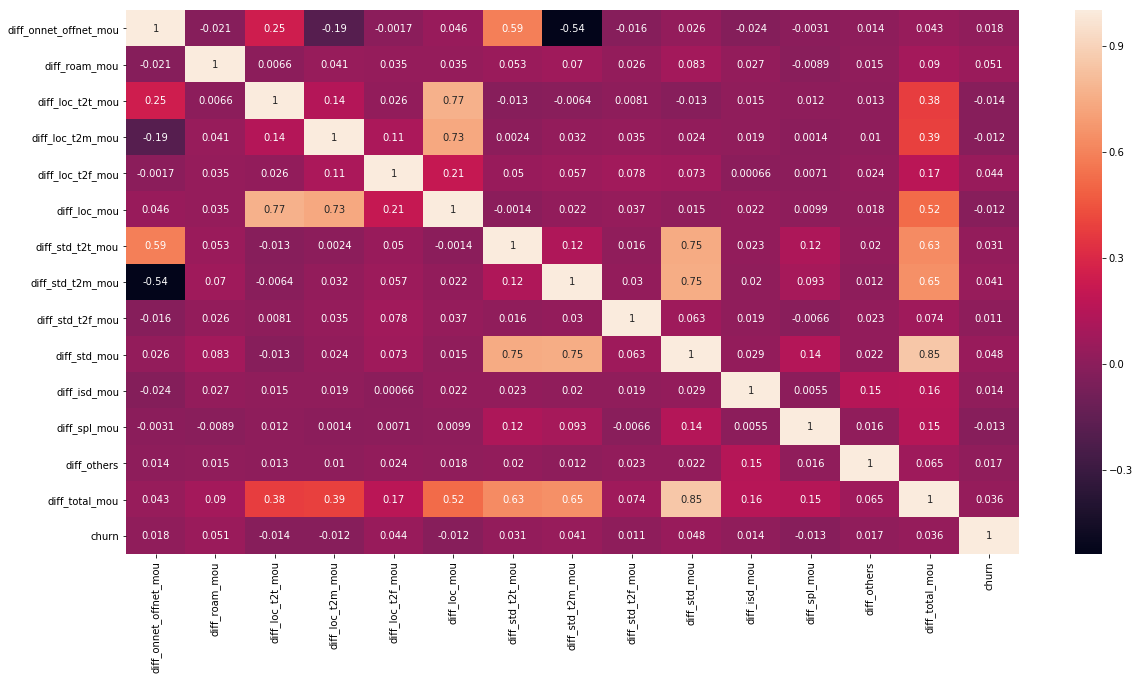

In [692]:
feats=['diff_onnet_offnet_mou','diff_roam_mou','diff_loc_t2t_mou','diff_loc_t2m_mou','diff_loc_t2f_mou',\
                              'diff_loc_mou','diff_std_t2t_mou','diff_std_t2m_mou','diff_std_t2f_mou','diff_std_mou',\
                              'diff_isd_mou','diff_spl_mou','diff_others','diff_total_mou','churn']

plt.figure(figsize = (20,10))
sns.heatmap(final_derived_df[feats].corr(),annot=True)


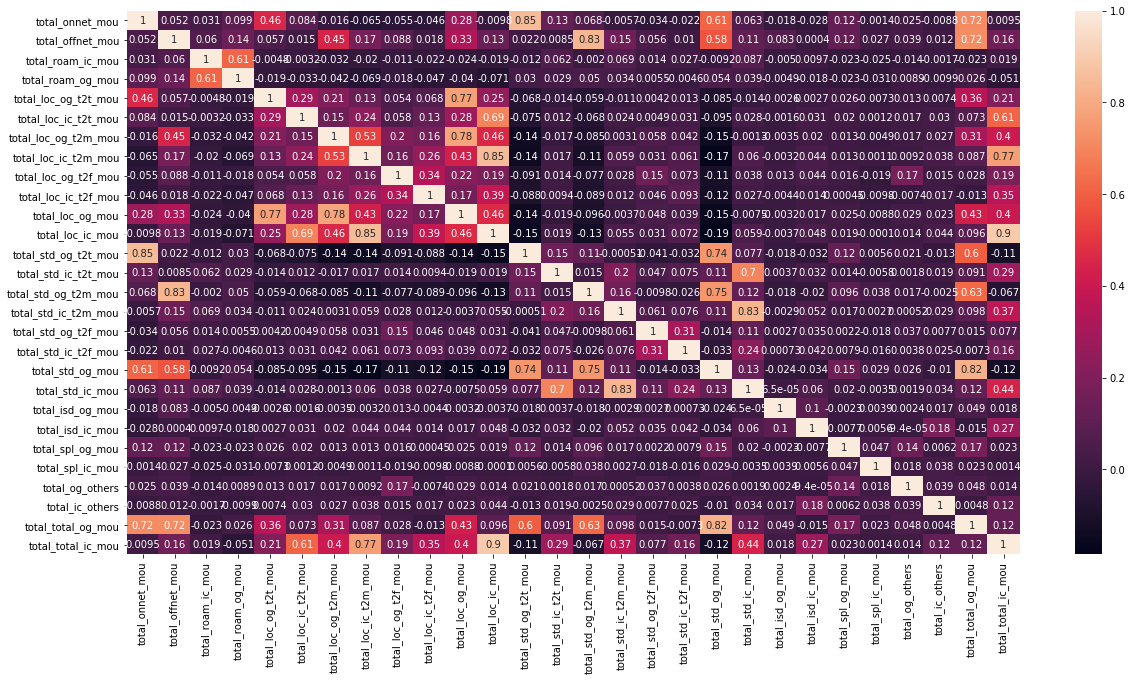

In [693]:
old_feats=['total_onnet_mou','total_offnet_mou','total_roam_ic_mou','total_roam_og_mou','total_loc_og_t2t_mou','total_loc_ic_t2t_mou','total_loc_og_t2m_mou','total_loc_ic_t2m_mou','total_loc_og_t2f_mou','total_loc_ic_t2f_mou','total_loc_og_mou','total_loc_ic_mou','total_std_og_t2t_mou','total_std_ic_t2t_mou','total_std_og_t2m_mou','total_std_ic_t2m_mou','total_std_og_t2f_mou','total_std_ic_t2f_mou','total_std_og_mou','total_std_ic_mou','total_isd_og_mou','total_isd_ic_mou','total_spl_og_mou','total_spl_ic_mou','total_og_others','total_ic_others','total_total_og_mou','total_total_ic_mou']
plt.figure(figsize = (20,10))
sns.heatmap(final_derived_df[old_feats].corr(),annot=True)

Also The correlation between churn and old features are nothing significant, So we can use only derived features to reduce the dimensions.

In [694]:
old_feats=['total_onnet_mou','total_offnet_mou','total_roam_ic_mou','total_roam_og_mou','total_loc_og_t2t_mou','total_loc_ic_t2t_mou','total_loc_og_t2m_mou','total_loc_ic_t2m_mou','total_loc_og_t2f_mou','total_loc_ic_t2f_mou','total_loc_og_mou','total_loc_ic_mou','total_std_og_t2t_mou','total_std_ic_t2t_mou','total_std_og_t2m_mou','total_std_ic_t2m_mou','total_std_og_t2f_mou','total_std_ic_t2f_mou','total_std_og_mou','total_std_ic_mou','total_isd_og_mou','total_isd_ic_mou','total_spl_og_mou','total_spl_ic_mou','total_og_others','total_ic_others','total_total_og_mou','total_total_ic_mou']
final_derived_df=final_derived_df.drop(old_feats,axis=1)
final_derived_df.shape

(30015, 100)

In [695]:
#churn_rate
churn = (sum(final_derived_df['churn'])/len(final_derived_df['churn'].index))*100
churn

8.195902048975512

## Data Visulization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


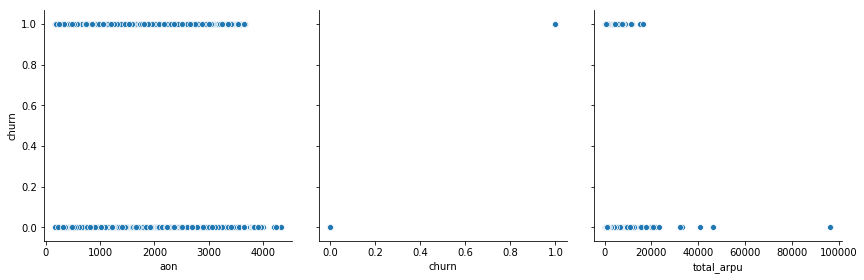

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


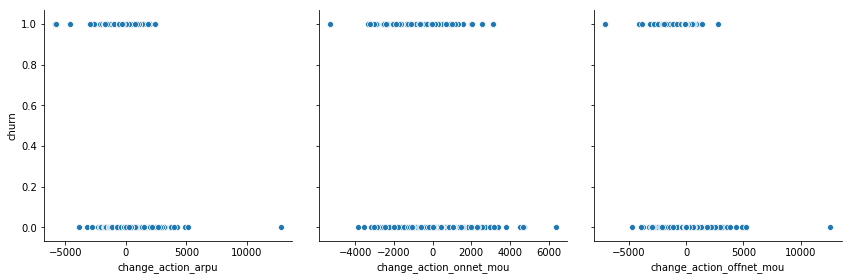

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


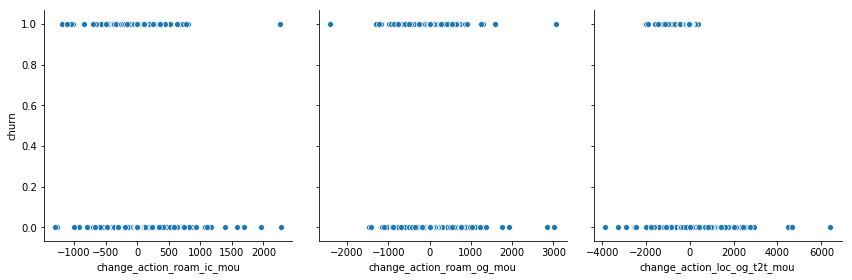

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


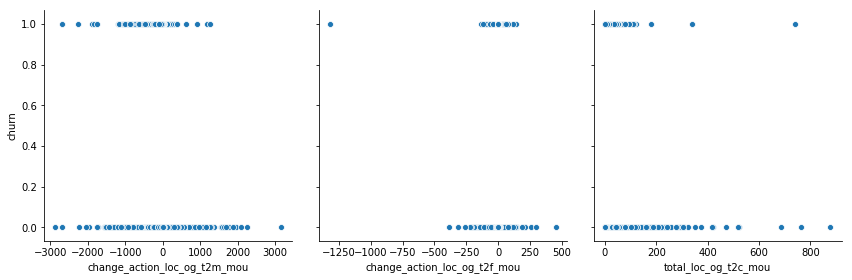

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


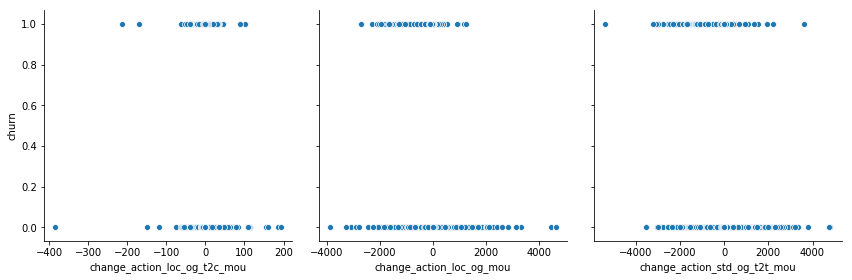

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


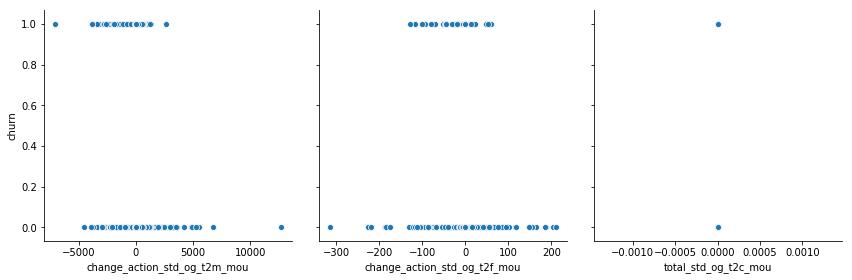

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


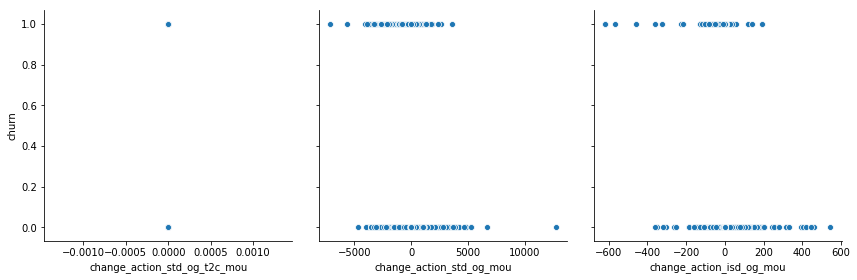

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


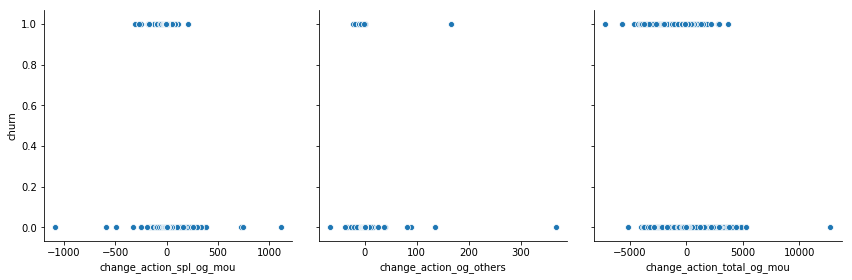

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


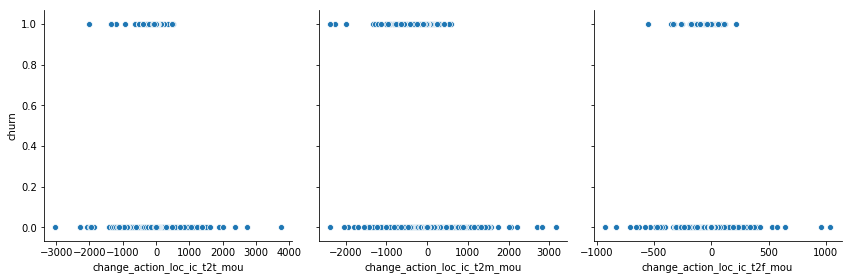

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


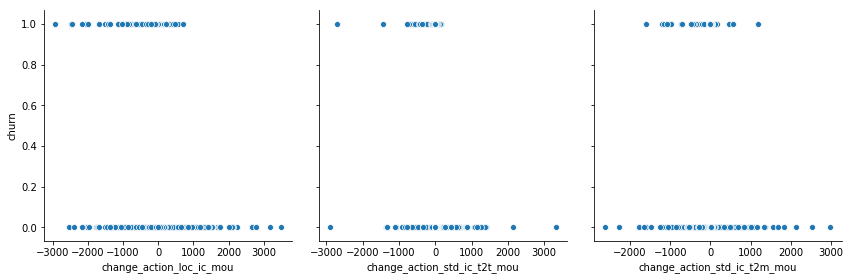

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


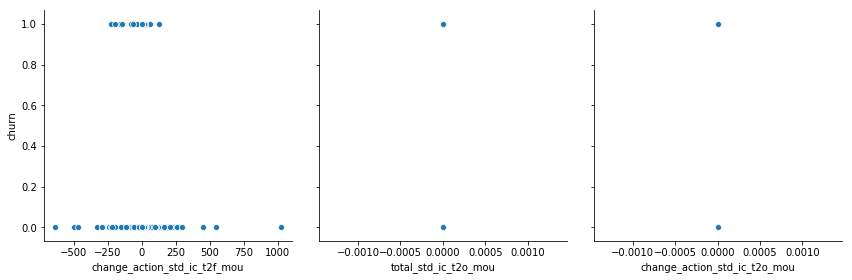

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


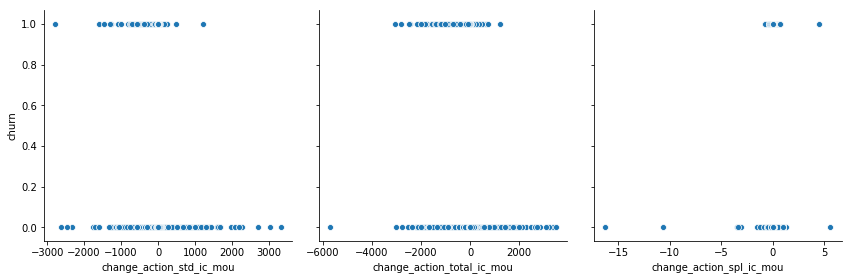

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


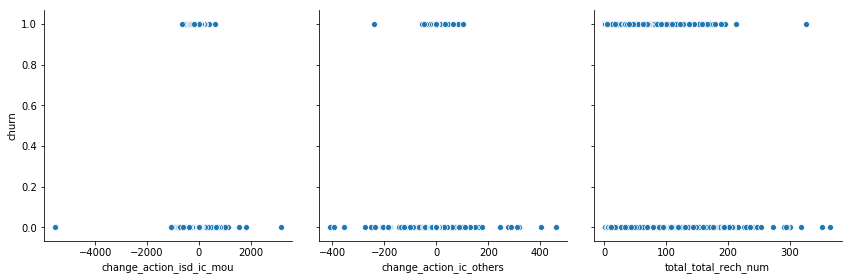

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


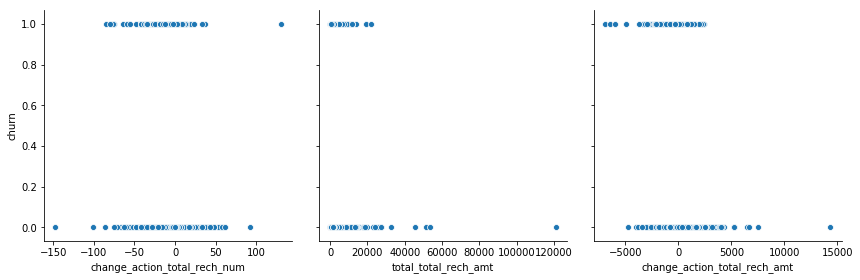

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


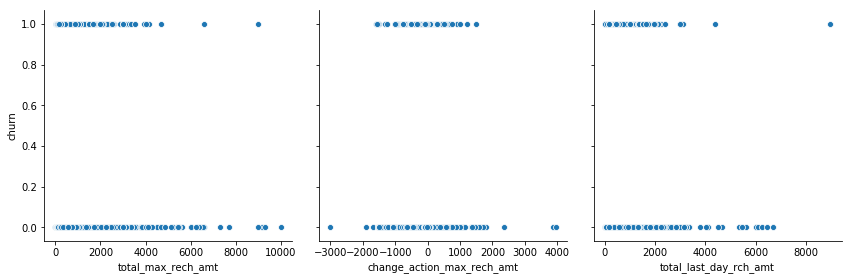

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


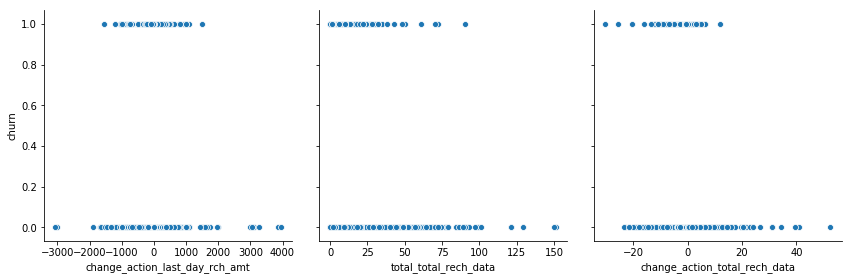

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


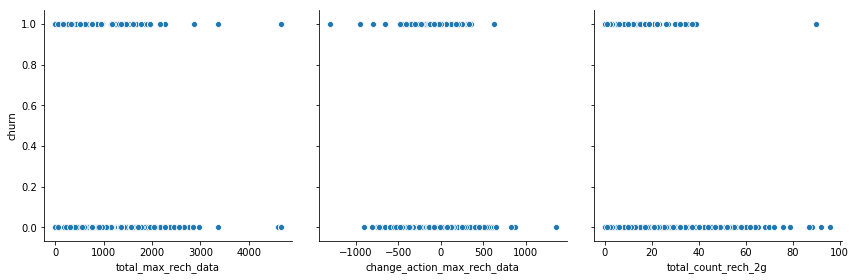

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


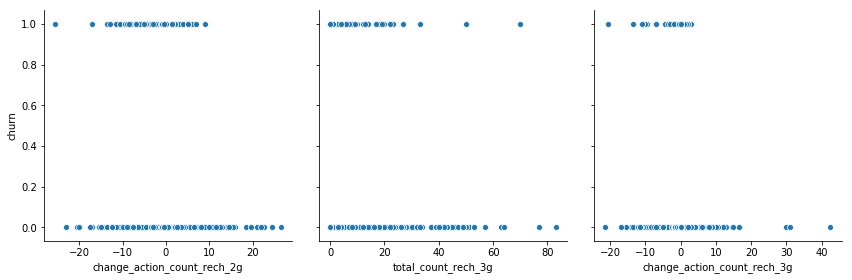

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


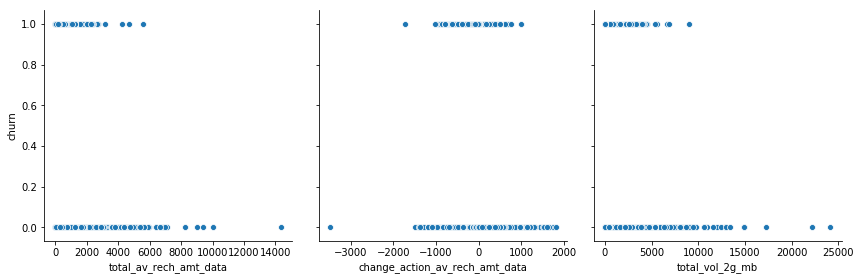

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


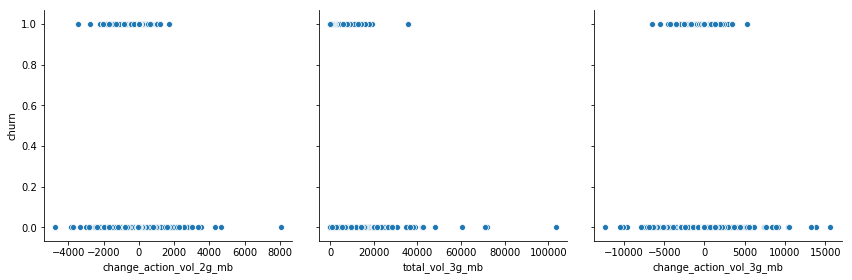

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


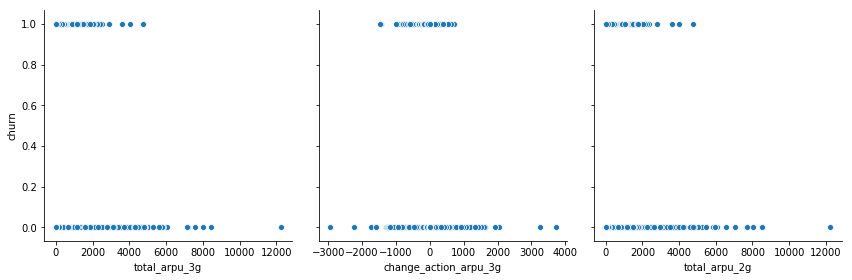

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


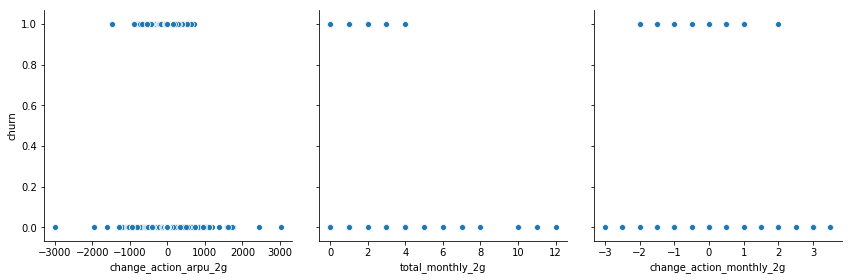

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


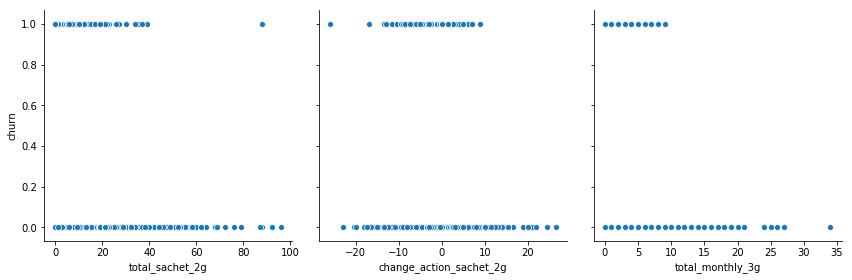

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


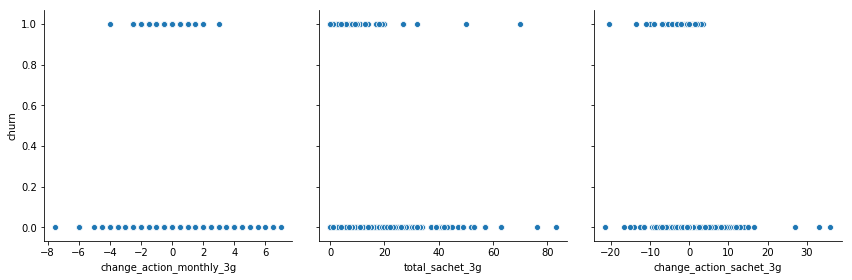

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


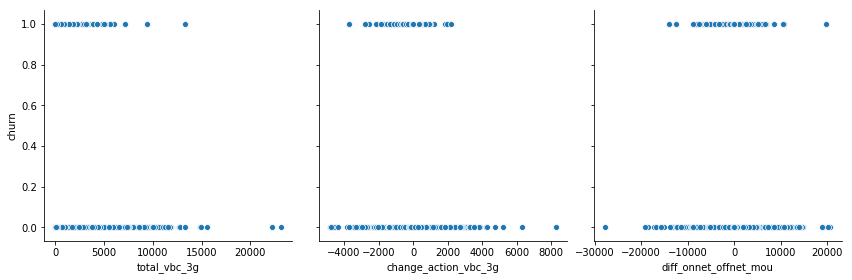

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


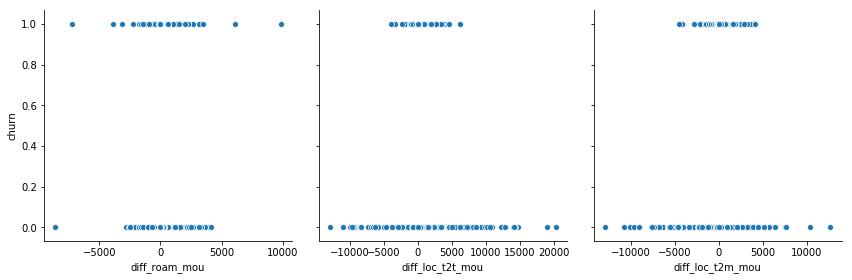

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


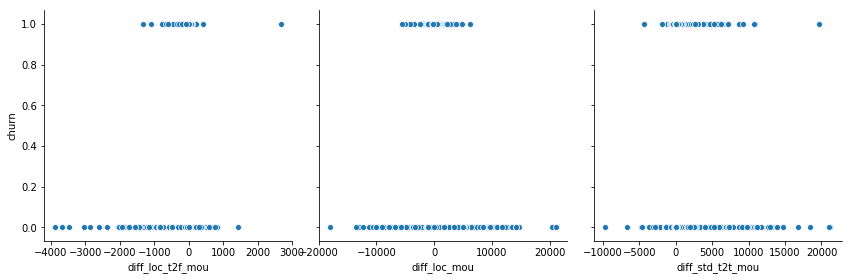

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


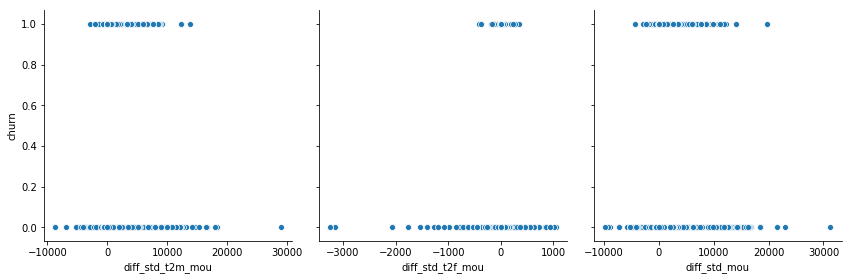

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


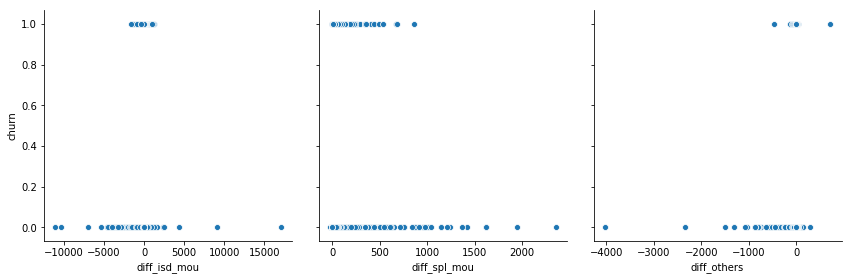

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


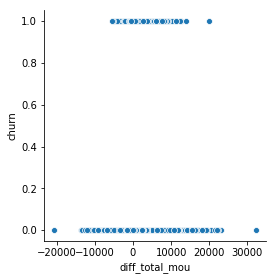

In [696]:
#Scatter plot for numerical variables
numerical_feats=final_derived_df.dtypes[(final_derived_df.dtypes != "object") & (final_derived_df.dtypes != "category")].index

V_len=len(numerical_feats)
offset=0
count=3
while offset < V_len:
    end=offset+count
    if end > V_len:
        end=V_len
    sns.pairplot(final_derived_df, x_vars=numerical_feats[offset:end], y_vars='churn',size=4, aspect=1, kind='scatter')
    plt.show()
    offset=end

# Test Train Split

In [731]:
final_data=final_derived_df

In [732]:
cat_feats=final_data.dtypes[(final_data.dtypes == "object") | (final_data.dtypes == "category")].index
cat_feats
final_data[cat_feats]=final_data[cat_feats].apply(lambda x : x.astype('int'))

In [733]:
#Import scale package
from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(final_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = final_data['churn']
#Get independent columns and update dataframe
X.columns=final_data.drop('churn',axis=1).columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [734]:
#Import test_train_split to get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100, stratify=y)

In [735]:
 len(y_train[y_train == 1])/len(y_train)*100

8.196097096620656

Text(0, 0.5, 'count')

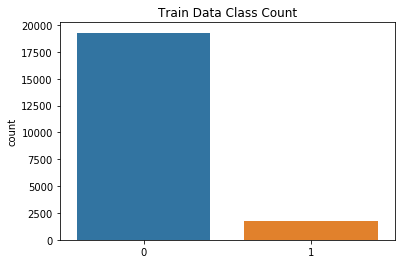

In [736]:
sns.barplot(y=[len(y_train[y_train == 0]),len(y_train[y_train == 1])],x=[0,1])
plt.title('Train Data Class Count')
plt.ylabel('count')

In [737]:
 len(y_test[y_test == 1])/len(y_test)*100

8.195446973903387

Text(0, 0.5, 'count')

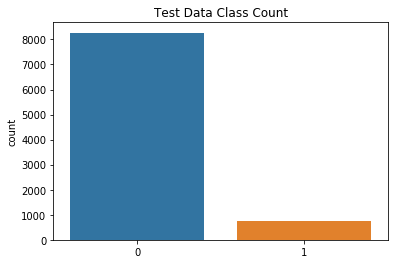

In [738]:
sns.barplot(y=[len(y_test[y_test == 0]),len(y_test[y_test == 1])],x=[0,1])
plt.title('Test Data Class Count')
plt.ylabel('count')

<b>Test and Train classes are fairly balanced.</b>

# Random Forrest Using PCA

In [871]:
X_train_pca=X_train
X_test_pca=X_test
y_train_pca=y_train
y_test_pca=y_test

#Get train and validation data
X_train_pca, X_val, y_train_pca, y_val = train_test_split(X_train_pca, y_train_pca, test_size=0.3, random_state=100)

In [985]:
# Importing metrics for evalutation from  from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score,accuracy_score

In [873]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

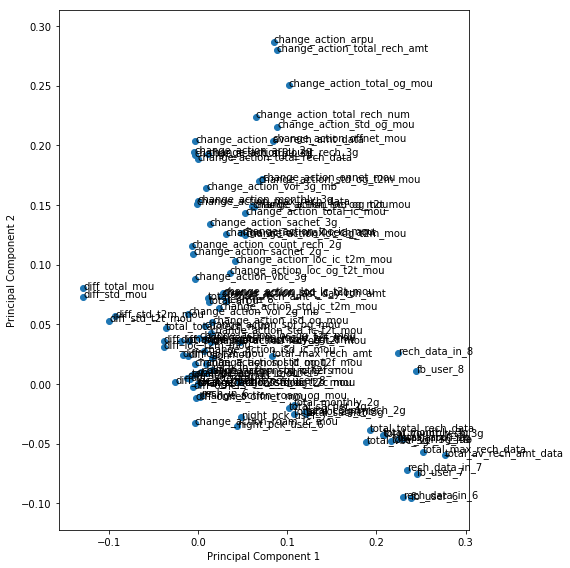

In [874]:
# Lets see the distibutions of columns in PCA in 2d space
pca.fit(X_train_pca)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train_pca.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

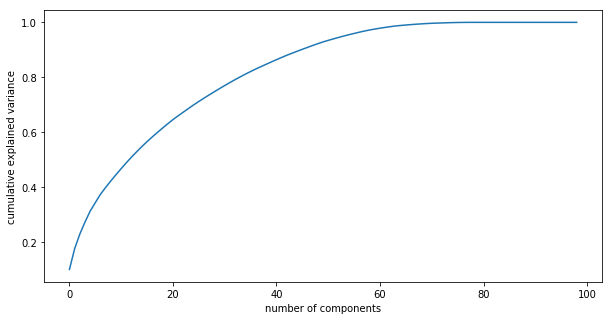

In [875]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like we need 50% of componenets to describe the data fairly

In [876]:
colnames = list(X_train_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.043988,-0.035470,night_pck_user_6
1,0.048392,-0.027638,night_pck_user_7
2,0.046600,0.001740,night_pck_user_8
3,0.238978,-0.095443,fb_user_6
4,0.245297,-0.075630,fb_user_7


In [877]:
pca.explained_variance_ratio_

array([1.00081001e-01, 7.51219741e-02, 5.34074481e-02, 4.38476364e-02,
       3.98749005e-02, 3.11183832e-02, 3.05328602e-02, 2.50353533e-02,
       2.36349532e-02, 2.26301505e-02, 2.20831950e-02, 2.14412293e-02,
       2.07631199e-02, 1.92676450e-02, 1.89853176e-02, 1.78636734e-02,
       1.69419448e-02, 1.65048311e-02, 1.59446258e-02, 1.56289488e-02,
       1.51777745e-02, 1.37484638e-02, 1.33886583e-02, 1.32790631e-02,
       1.31495583e-02, 1.25232828e-02, 1.20954345e-02, 1.17365309e-02,
       1.15699898e-02, 1.13164527e-02, 1.11871115e-02, 1.08881317e-02,
       1.05960279e-02, 1.00991963e-02, 9.97583493e-03, 9.49179480e-03,
       9.10964173e-03, 8.69566913e-03, 8.52722632e-03, 8.51278685e-03,
       8.36879939e-03, 8.10954215e-03, 7.91371746e-03, 7.41005807e-03,
       7.20538711e-03, 7.12831665e-03, 6.96991557e-03, 6.88095322e-03,
       6.65526305e-03, 6.43575792e-03, 5.54031953e-03, 5.42401686e-03,
       5.27284059e-03, 5.08432500e-03, 4.84236101e-03, 4.63241207e-03,
      

In [878]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [879]:
#Fit the train data
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(14707, 50)

#### Check correlation matrix

In [880]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

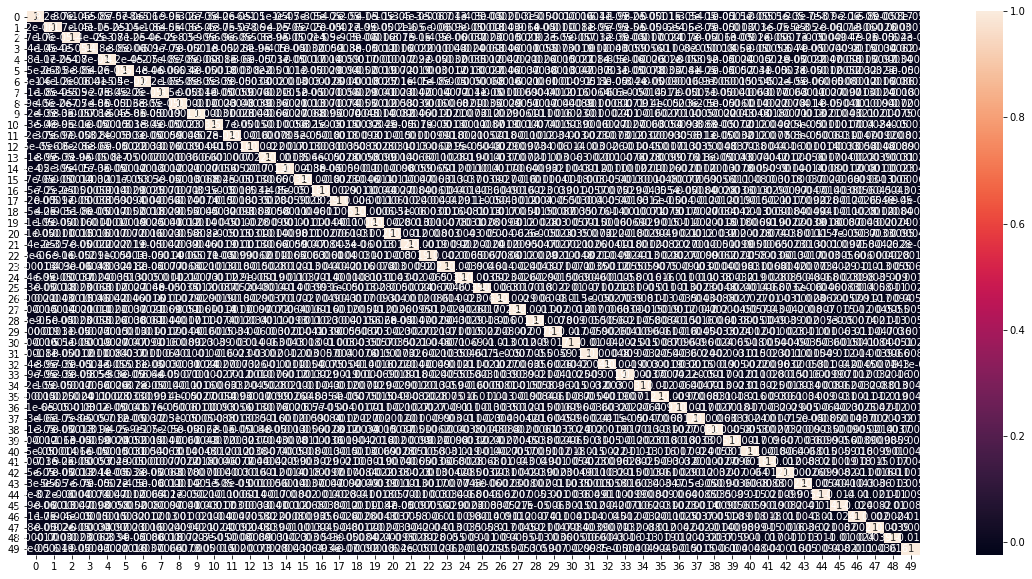

In [881]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [882]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.01819891509787449 , min corr:  -0.02372077040389343


<b>There is no significant correlation. We can approve the PCA Result</b>

In [883]:
#Fit the validation data
df_val_pca = pca_final.fit_transform(X_val)
df_val_pca.shape

(6303, 50)

In [884]:
#Fit the validation data
df_test_pca = pca_final.fit_transform(X_test_pca)
df_test_pca.shape

(9005, 50)

In [885]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# class_weight is balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

In [886]:
# fit
rfc.fit(df_train_pca,y_train_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [887]:
# Let's check the report of our default model on training data
print(classification_report(y_train_pca,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13485
           1       1.00      0.88      0.93      1222

   micro avg       0.99      0.99      0.99     14707
   macro avg       0.99      0.94      0.96     14707
weighted avg       0.99      0.99      0.99     14707



In [888]:
# Printing confusion matrix
print(confusion_matrix(y_train_pca,rfc.predict(df_train_pca)))

[[13483     2]
 [  150  1072]]


In [889]:
#Lets check on validation data
prediction_val=rfc.predict(df_val_pca)
print(classification_report(y_val,prediction_val))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5803
           1       0.67      0.02      0.04       500

   micro avg       0.92      0.92      0.92      6303
   macro avg       0.79      0.51      0.50      6303
weighted avg       0.90      0.92      0.89      6303



In [890]:
#accuracy score over validation
print(accuracy_score(y_val,prediction_val))

0.9214659685863874


#### Hyperparameter Tuning 

#### max_depth

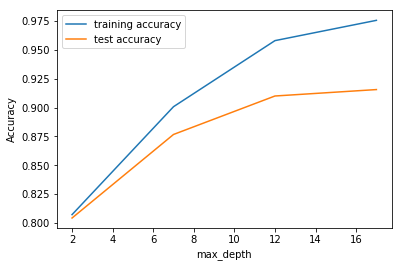

In [905]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data

grid_search = GridSearchCV(rfc, parameters, 
                          cv = n_folds,verbose = 0,scoring="accuracy")

grid_search.fit(df_train_pca,y_train_pca)

scores = grid_search.cv_results_

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [906]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9156864078330047 using {'max_depth': 17}


#### min_samples_leaf

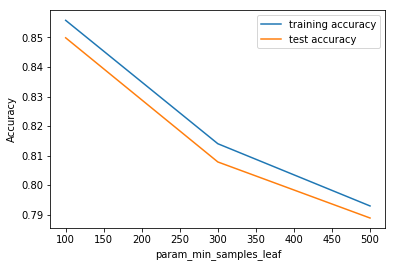

In [908]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 200)}

# instantiate the model
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data

grid_search = GridSearchCV(rfc, parameters, 
                          cv = n_folds,verbose = 0,scoring="accuracy")

grid_search.fit(df_train_pca,y_train_pca)

scores = grid_search.cv_results_

# plotting accuracies with param_min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [909]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8498674100768342 using {'min_samples_leaf': 100}


#### min_samples_split

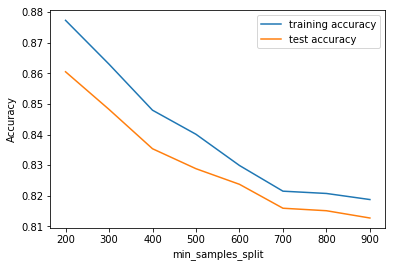

In [910]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 1000, 100)}

# instantiate the model
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data

grid_search = GridSearchCV(rfc, parameters, 
                          cv = n_folds,verbose = 0,scoring="accuracy")

grid_search.fit(df_train_pca,y_train_pca)

scores = grid_search.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [911]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8605425987624941 using {'min_samples_split': 200}


#### n_estimators

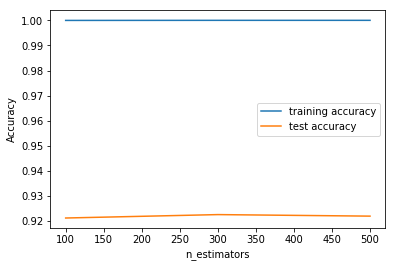

In [912]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = { 'n_estimators': range(100, 600, 200)}

# instantiate the model
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data

grid_search = GridSearchCV(rfc, parameters, 
                          cv = n_folds,verbose = 0,scoring="accuracy")

grid_search.fit(df_train_pca,y_train_pca)

scores = grid_search.cv_results_

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [914]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9225538859046712 using {'n_estimators': 300}


#### max_features

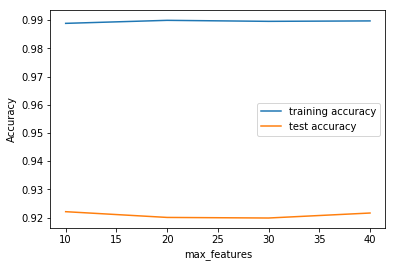

In [915]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features':  range(10, 50, 10)}

# instantiate the model
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data

grid_search = GridSearchCV(rfc, parameters, 
                          cv = n_folds,verbose = 0,scoring="accuracy")

grid_search.fit(df_train_pca,y_train_pca)

scores = grid_search.cv_results_

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [916]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.922077922077922 using {'max_features': 10}


### Building Model with optimal Hyperparameters

In [917]:
rfc = RandomForestClassifier(class_weight='balanced_subsample',
                            bootstrap=True,
                             max_depth=17,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [918]:
# fit
rfc.fit(df_train_pca,y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=17, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [919]:
# Let's check the report of our default model on training data
print(classification_report(y_train_pca,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13485
           1       0.35      0.79      0.48      1222

   micro avg       0.86      0.86      0.86     14707
   macro avg       0.66      0.83      0.70     14707
weighted avg       0.93      0.86      0.88     14707



In [920]:
# Printing confusion matrix
print(confusion_matrix(y_train_pca,rfc.predict(df_train_pca)))

[[11670  1815]
 [  257   965]]


In [921]:
#Lets check on validation data
prediction_val=rfc.predict(df_val_pca)
print(classification_report(y_val,prediction_val))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5803
           1       0.33      0.64      0.44       500

   micro avg       0.87      0.87      0.87      6303
   macro avg       0.65      0.76      0.68      6303
weighted avg       0.92      0.87      0.89      6303



In [922]:
# Printing confusion matrix
print(confusion_matrix(y_val,prediction_val))

[[5154  649]
 [ 180  320]]


In [923]:
#accuracy score over validation data
print(accuracy_score(y_val,prediction_val))

0.8684753292083135


In [925]:
#Lets check on Test data
prediction_test=rfc.predict(df_test_pca)
print(classification_report(y_test_pca,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      8267
           1       0.33      0.62      0.43       738

   micro avg       0.87      0.87      0.87      9005
   macro avg       0.65      0.75      0.68      9005
weighted avg       0.91      0.87      0.88      9005



In [928]:
# Printing confusion matrix
print(confusion_matrix(y_test_pca,prediction_test))

[[7343  924]
 [ 280  458]]


In [927]:
#accuracy score over Test data
print(accuracy_score(y_test_pca,prediction_test))

0.8662965019433648


<b> Using PCA and Random Forrest, F1 Score is 0.92, precision 0.96 and accuracy 0.87,/b>

# Logistic Regression Using RFE

In [955]:
X_train_rfe=X_train
X_test_rfe=X_test
y_train_rfe=y_train
y_test_rfe=y_test

In [956]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [957]:
lm=LogisticRegression(class_weight='balanced') 

lm.fit(X_train_rfe,y_train_rfe)

var_rfe=RFE(lm,60)
var_rfe=var_rfe.fit(X_train_rfe,y_train_rfe)

In [958]:
RFE_variates=X_train_rfe.columns[var_rfe.support_]
print(RFE_variates)

Index(['fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'rech_in_6', 'rech_in_8',
       'rech_data_in_7', 'rech_data_in_8', 'change_action_arpu',
       'change_action_onnet_mou', 'change_action_offnet_mou',
       'change_action_roam_ic_mou', 'change_action_loc_og_t2t_mou',
       'total_loc_og_t2c_mou', 'change_action_std_og_t2t_mou',
       'change_action_std_og_t2m_mou', 'change_action_std_og_mou',
       'change_action_isd_og_mou', 'change_action_total_og_mou',
       'change_action_loc_ic_t2t_mou', 'change_action_loc_ic_t2m_mou',
       'change_action_loc_ic_t2f_mou', 'change_action_loc_ic_mou',
       'change_action_std_ic_t2t_mou', 'change_action_total_ic_mou',
       'change_action_spl_ic_mou', 'change_action_isd_ic_mou',
       'change_action_ic_others', 'total_total_rech_num',
       'change_action_total_rech_num', 'total_total_rech_amt',
       'total_max_rech_amt', 'total_last_day_rch_amt',
       'change_action_last_day_rch_amt', 'change_action_total_rech_data',
       'tot

In [959]:
X_train_rfe=X_train_rfe[RFE_variates]

In [960]:
X_train_rfe.shape

(21010, 60)

### Correlation Matrix and  multicollinearity 

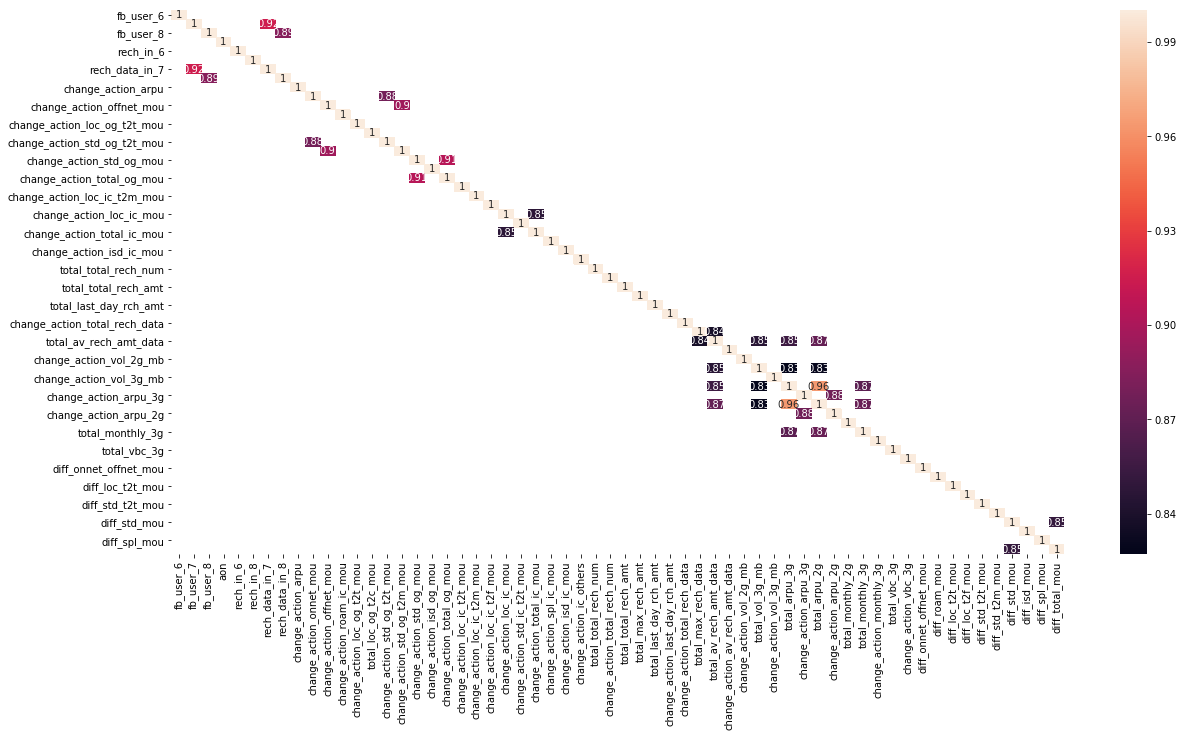

In [961]:
corr_matrix=X_train_rfe[RFE_variates].corr()
multicollinear_matrix=corr_matrix[(corr_matrix>=0.8)|(corr_matrix<=-0.8)]
multicollinear_matrix=multicollinear_matrix[~multicollinear_matrix.isnull().all(axis=0)]
plt.figure(figsize = (20,10))
sns.heatmap(multicollinear_matrix,annot = True)

In [963]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X, thresh=5.0):
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [964]:
#Calculate VIF and Dropping all the column has VIF more than 0.5
X_train_rfe=calculate_vif(X_train_rfe)

Dropping change_action_loc_ic_mou with vif=722811393.6325947
Dropping change_action_std_og_mou with vif=3434.6418169687395
Dropping diff_std_mou with vif=1089.9365089358855
Dropping change_action_total_og_mou with vif=107.08535483799497
Dropping change_action_onnet_mou with vif=56.158837784724916
Dropping total_arpu_2g with vif=21.089963407811062
Dropping diff_total_mou with vif=13.650578286329727
Dropping total_arpu_3g with vif=11.230130090705812
Dropping change_action_total_ic_mou with vif=8.998554221491526
Dropping fb_user_7 with vif=8.877356021027405
Dropping total_av_rech_amt_data with vif=8.646549522702578
Dropping change_action_offnet_mou with vif=7.618237600577656
Dropping fb_user_8 with vif=6.30011403282167
Dropping diff_onnet_offnet_mou with vif=5.903843238118085
Dropping change_action_arpu_2g with vif=5.722723856103305


In [998]:
X_train_rfe.shape

(21010, 45)

In [1051]:

#Defining generic function for building model
def classification_result(R,X,Y):
    y_pred = R.predict(X).values.reshape(-1)
    y_pred_final = pd.DataFrame({'Churn':Y.churn, 'Churn_Prob':y_pred})
    y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
    confusion = confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Accuracy:")
    print(accuracy_score(y_pred_final.Churn, y_pred_final.predicted))
    return y_pred_final

def Calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Build Logistic Regression Model

In [1000]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial()).fit()
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20964
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4153.0
Date:                Mon, 19 Aug 2019   Deviance:                       8306.0
Time:                        22:11:22   Pearson chi2:                 3.46e+07
No. Iterations:                     8   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.5743      0.054    -66.630      0.000      -3.679     

<b>Check VIF</b>

In [1002]:
Calculate_vif(X_train_sm)

,Features,VIF
45,total_max_rech_data,4.45
32,change_action_arpu_3g,3.64
28,change_action_av_rech_amt_data,3.52
30,total_vol_3g_mb,3.07
24,total_max_rech_amt,3.05
7,change_action_arpu,2.85
34,total_monthly_3g,2.72
35,change_action_monthly_3g,2.64
25,total_last_day_rch_amt,2.51
1,fb_user_6,2.48


In [1006]:
y_pred_final=classification_result(lr,X_train_sm,y_train)

Confusion Matrix:
[[18554   734]
 [  901   821]]
Accuracy:
0.9221799143265111


## Plotting ROC Curve

In [1022]:
from sklearn.metrics import roc_curve,roc_auc_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1023]:
fpr, tpr, thresholds = roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )

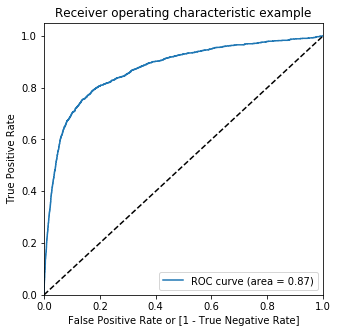

In [1024]:
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

## Testing in Test Data

In [1025]:
X_test_rfe=X_test_rfe[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test_rfe)
y_pred = lr.predict(X_test_sm).values.reshape(-1)

#### Check Accuracy

In [1026]:
y_pred_final = pd.DataFrame({'Churn':y_test_rfe.values, 'Churn_Prob':y_pred})
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
confusion = confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
print("Confusion Matrix:")
print(confusion)
print("Accuracy:")
print(accuracy_score(y_pred_final.Churn, y_pred_final.predicted))

Confusion Matrix:
[[7954  313]
 [ 358  380]]
Accuracy:
0.9254858411993337


So We get 92% Accuracy

# Important Predictors

In [1041]:
X_train_rfe.columns.values

array(['fb_user_6', 'aon', 'rech_in_6', 'rech_in_8', 'rech_data_in_7',
       'rech_data_in_8', 'change_action_arpu',
       'change_action_roam_ic_mou', 'change_action_loc_og_t2t_mou',
       'total_loc_og_t2c_mou', 'change_action_std_og_t2t_mou',
       'change_action_std_og_t2m_mou', 'change_action_isd_og_mou',
       'change_action_loc_ic_t2t_mou', 'change_action_loc_ic_t2m_mou',
       'change_action_loc_ic_t2f_mou', 'change_action_std_ic_t2t_mou',
       'change_action_spl_ic_mou', 'change_action_isd_ic_mou',
       'change_action_ic_others', 'total_total_rech_num',
       'change_action_total_rech_num', 'total_total_rech_amt',
       'total_max_rech_amt', 'total_last_day_rch_amt',
       'change_action_last_day_rch_amt', 'change_action_total_rech_data',
       'change_action_av_rech_amt_data', 'change_action_vol_2g_mb',
       'total_vol_3g_mb', 'change_action_vol_3g_mb',
       'change_action_arpu_3g', 'total_monthly_2g', 'total_monthly_3g',
       'change_action_monthly_3g', '